# AR6 WG1 - SPM.10

This notebook reproduces the top panel of **Figure SPM.10** of the IPCC's *Working Group I contribution to the Sixth Assessment Report* ([AR6 WG1](https://www.ipcc.ch/assessment-report/ar6/)).

The data supporting the SPM figure is published under a Creative Commons CC-BY license at 
the [Centre for Environmental Data Analyis (CEDA)](https://catalogue.ceda.ac.uk/uuid/ae4f1eb6fce24adcb92ddca1a7838a5c).

This notebook uses a version of that data which was processed for interoperability with the format used by IPCC WG3, the so-called IAMC format.  
The notebook is available under an open-source [BSD-3 License](https://github.com/openscm/AR6-WG1-Data-Compilation/blob/main/LICENSE) in the [openscm/AR6-WG1-Data-Compilation](https://github.com/openscm/AR6-WG1-Data-Compilation) GitHub repository.

The notebook uses the community Python package [scmdata](https://scmdata.readthedocs.io), which is designed to handle simple climate model data but generalises to handle all sorts of timeseries-based data including data in the IAMC format. While it is primarily a data handling package and not a plotting package, scmdata does offer some convenient plotting functions which we use in these notebooks alongside [seaborn](https://seaborn.pydata.org) and native [matplotlib](https://matplotlib.org/) as required.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pyam
import scmdata
import yaml

import utils

<IPython.core.display.Javascript object>

In [2]:
plt.rcParams["axes.xmargin"] = 0
plt.rcParams["figure.figsize"] = (12, 8)

In [3]:
with open("plotting.yaml") as fh:
    palette = yaml.safe_load(fh)["color"]["scenario"]
    
palette = {k: pyam.plotting.PYAM_COLORS[v] for k, v in palette.items()}
palette["historical"] = "tab:gray"
palette

{'SSP1-1.9': '#00a9cf',
 'SSP1-2.6': '#003466',
 'SSP2-4.5': '#f69320',
 'SSP3-7.0': '#df0000',
 'SSP5-8.5': '#980002',
 'historical': 'tab:gray'}

In [4]:
input_file = utils.DATA_DIR / "processed" / "fig-spm10" / "fig-spm10-timeseries.csv"
input_file

PosixPath('/Users/znicholls/Documents/AGCEC/MCastle/ar6-wg1-data-compilation/data/processed/fig-spm10/fig-spm10-timeseries.csv')

In [5]:
data = scmdata.ScmRun(str(input_file))
data.head()

time                                                                                                                                            1850-01-01  \
model                        reference_period_end_year reference_period_start_year region scenario   unit  variable                                          
IAMs                         1850                      1850                        World  SSP3-7.0   GtCO2 Cumulative Emissions|CO2                    NaN   
Ch.4 assessment              1900                      1850                        World  SSP3-7.0   K     Surface Air Temperature Change|Mean         NaN   
                                                                                                           Surface Air Temperature Change|5%           NaN   
                                                                                                           Surface Air Temperature Change|95%          NaN   
Friedlingstein et al. (2020) 1850                      1850                        World  historical GtCO2 Cumulative Emissions|CO2                2.66825   

time                                                                                                                                            1851-01-01  \
model                        reference_period_end_year reference_period_start_year region scenario   unit  variable                                          
IAMs                         1850                      1850                        World  SSP3-7.0   GtCO2 Cumulative Emissions|CO2                    NaN   
Ch.4 assessment              1900                      1850                        World  SSP3-7.0   K     Surface Air Temperature Change|Mean         NaN   
                                                                                                           Surface Air Temperature Change|5%           NaN   
                                                                                                           Surface Air Temperature Change|95%          NaN   
Friedlingstein et al. (2020) 1850                      1850                        World  historical GtCO2 Cumulative Emissions|CO2               5.355922   

time                                                                                                                                            1852-01-01  \
model                        reference_period_end_year reference_period_start_year region scenario   unit  variable                                          
IAMs                         1850                      1850                        World  SSP3-7.0   GtCO2 Cumulative Emissions|CO2                    NaN   
Ch.4 assessment              1900                      1850                        World  SSP3-7.0   K     Surface Air Temperature Change|Mean         NaN   
                                                                                                           Surface Air Temperature Change|5%           NaN   
                                                                                                           Surface Air Temperature Change|95%          NaN   
Friedlingstein et al. (2020) 1850                      1850                        World  historical GtCO2 Cumulative Emissions|CO2               8.070161   

time                                                                                                                                            1853-01-01  \
model                        reference_period_end_year reference_period_start_year region scenario   unit  variable                                          
IAMs                         1850                      1850                        World  SSP3-7.0   GtCO2 Cumulative Emissions|CO2                    NaN   
Ch.4 assessment              1900                      1850                        World  SSP3-7.0   K     Surface Air Temperature Change|Mean         NaN   
                                               

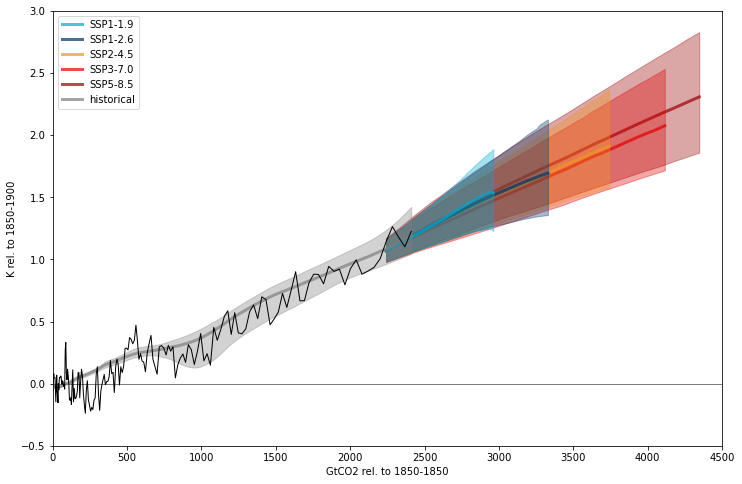

In [6]:
x_unit = "GtCO2"
x_ticks = np.arange(0, 4501, 500)
y_unit = "K"
y_ticks = np.arange(-0.5, 3.01, 0.5)
linewidth = 3

zorders = {
    "historical": 5,
    "SSP1-1.9": 4,
    "SSP1-2.6": 3.9,
    "SSP2-4.5": 3.8,
    "SSP3-7.0": 3.7,
    "SSP5-8.5": 3.6,
}

ax = plt.figure(figsize=(12, 8)).add_subplot(111)
for sdf in data.groupby("scenario"):
    scenario = sdf.get_unique_meta("scenario", True)
    
    if scenario == "historical":
        st = "Surface Air Temperature Change|Anthropogenic"
    else:
        st = "Surface Air Temperature Change"
    
    x_axis = sdf.filter(variable="Cumulative Emissions|CO2").convert_unit(x_unit).values.squeeze()
    mean_temp = sdf.filter(variable=f"{st}|Mean").convert_unit(y_unit).values.squeeze()
    fifth_temp = sdf.filter(variable=f"{st}|5%").convert_unit(y_unit).values.squeeze()
    ninetyfifth_temp = sdf.filter(variable=f"{st}|95%").convert_unit(y_unit).values.squeeze()
    
    colour = palette[scenario]
    zorder = zorders[scenario]
    
    ax.plot(
        x_axis,
        mean_temp,
        color=colour,
        linewidth=linewidth,
        alpha=0.7,
        label=scenario,
        zorder=zorder
    )
    ax.fill_between(
        x_axis,
        fifth_temp,
        ninetyfifth_temp,
        color=colour,
        alpha=0.35,
        zorder=zorder
    )
    if scenario == "historical":
        ax.plot(
            x_axis,
            sdf.filter(variable=f"Surface Air Temperature Change|Mean").convert_unit(y_unit).values.squeeze(),
            color="black",
            linewidth=1,
            alpha=1,
            zorder=zorder + 0.1,
        )
    
ax.axhline(0, color="black", linewidth=0.5)
gsat = data.filter(variable="Surface Air Temperature Change*")
gsat_ref_start = gsat.get_unique_meta("reference_period_start_year", True)
gsat_ref_end = gsat.get_unique_meta("reference_period_end_year", True)

emms = data.filter(variable="Cumulative Emissions|CO2")
emms_ref_start = emms.get_unique_meta("reference_period_start_year", True)
emms_ref_end = emms.get_unique_meta("reference_period_end_year", True)

ax.set_ylabel(f"{y_unit} rel. to {gsat_ref_start}-{gsat_ref_end}")
ax.set_xlabel(f"{x_unit} rel. to {emms_ref_start}-{emms_ref_end}")

ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)

ax.legend()

<AxesSubplot:xlabel='time', ylabel='K'>

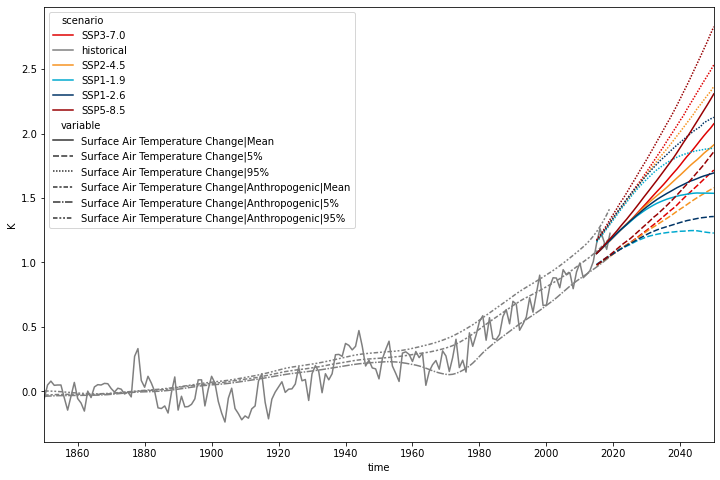

In [7]:
gsat.lineplot(hue="scenario", palette=palette, style="variable")

<AxesSubplot:xlabel='time', ylabel='GtCO2'>

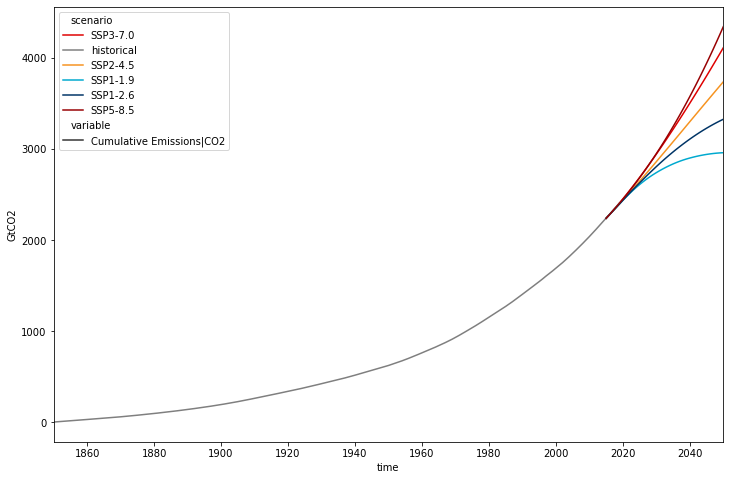

In [8]:
emms.lineplot(hue="scenario", palette=palette, style="variable")